<a href="https://colab.research.google.com/github/devashishrawat808/Malaria-Detection/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Malaria Detection**

###**Importing Libraries**

In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab.inline

UsageError: Line magic function `%pylab.inline` not found.


In [ ]:
#Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
#saving image path
train_path = '/content/drive/MyDrive/cell_images/train'
valid_path = '/content/drive/MyDrive/cell_images/test'

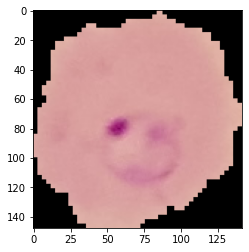

In [ ]:
#displaying image from google drive
img=mpimg.imread('/content/drive/MyDrive/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
plt.imshow(img)
plt.show()


In [ ]:
# Checking number of outputs
folders = glob('/content/drive/MyDrive/cell_images/train/*')
folders

['/content/drive/MyDrive/cell_images/train/parasitized',
 '/content/drive/MyDrive/cell_images/train/uninfected']

###**Importing Dataset**

In [ ]:
# Use the Image Data Generator to import the images from the google drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 24959 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2600 images belonging to 2 classes.


###**ResNet50**

In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Not Training existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# our layers 
x = Flatten()(resnet.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
resnet_model = Model(inputs=resnet.input, outputs=prediction)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# compilin the model
resnet_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
res = resnet_model.fit_generator(training_set,validation_data=test_set, epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
780/780 [==============================] - 305s 391ms/step - loss: 0.5993 - accuracy: 0.7421 - val_loss: 0.5739 - val_accuracy: 0.7554
Epoch 2/20
780/780 [==============================] - 304s 389ms/step - loss: 0.6506 - accuracy: 0.7348 - val_loss: 0.7432 - val_accuracy: 0.6969
Epoch 3/20
780/780 [==============================] - 303s 389ms/step - loss: 0.6360 - accuracy: 0.7357 - val_loss: 0.4700 - val_accuracy: 0.7973
Epoch 4/20
780/780 [==============================] - 304s 389ms/step - loss: 0.5817 - accuracy: 0.7478 - val_loss: 0.5528 - val_accuracy: 0.7704
Epoch 5/20
780/780 [==============================] - 303s 388ms/step - loss: 0.5888 - accuracy: 0.7469 - val_loss: 0.6273 - val_accuracy: 0.7419
Epoch 6/20
780/780 [==============================] - 305s 391ms/step - loss: 0.6385 - accuracy: 0.7397 - val_loss: 0.5208 - val_accuracy: 0.7862
Epoch 7/20
780/780 [==============================] - 308s 395ms/step - loss: 0.6397 - accuracy: 0.7413 - val_loss: 1.6090 -

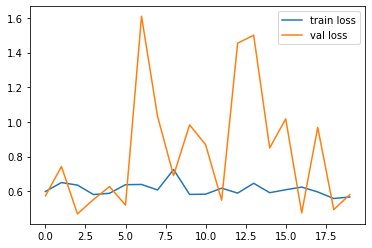

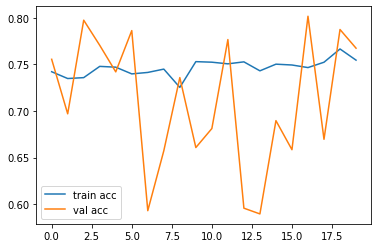

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(res.history['accuracy'], label='train acc')
plt.plot(res.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

As we can see that model not performing well, let's try next model

##**VGG19**

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(training_set,validation_data=test_set, epochs=50,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
780/780 [==============================] - 6564s 8s/step - loss: 0.5338 - accuracy: 0.7797 - val_loss: 0.2959 - val_accuracy: 0.8723
Epoch 2/50
780/780 [==============================] - 320s 410ms/step - loss: 0.2677 - accuracy: 0.8952 - val_loss: 0.3227 - val_accuracy: 0.8731
Epoch 3/50
780/780 [==============================] - 321s 411ms/step - loss: 0.2664 - accuracy: 0.8970 - val_loss: 0.3771 - val_accuracy: 0.8608
Epoch 4/50
780/780 [==============================] - 319s 408ms/step - loss: 0.2466 - accuracy: 0.9064 - val_loss: 0.2472 - val_accuracy: 0.9008
Epoch 5/50
780/780 [==============================] - 319s 408ms/step - loss: 0.2537 - accuracy: 0.9095 - val_loss: 0.6093 - val_accuracy: 0.7619
Epoch 6/50
780/780 [==============================] - 318s 408ms/step - loss: 0.2565 - accuracy: 0.9043 - val_loss: 0.2481 - val_accuracy: 0.9096
Epoch 7/50
780/780 [==============================] - 319s 408ms/step - loss: 0.2515 - accuracy: 0.9147 - val_loss: 0.2653 - v

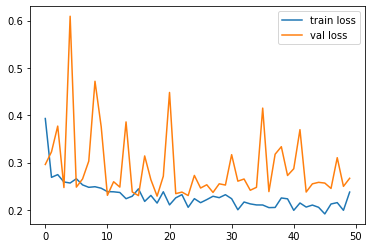

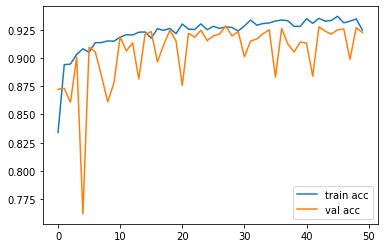

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

We can see that VGG19 performing better than Restnet50 for this dataset

###**Saving the model**

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[9.9665350e-01, 3.3464991e-03],
       [1.0000000e+00, 3.8328166e-10],
       [6.0288966e-02, 9.3971103e-01],
       ...,
       [9.9299204e-01, 7.0079784e-03],
       [7.0777992e-03, 9.9292219e-01],
       [9.9999988e-01, 1.1579844e-07]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
# importing image from Uninfected test dataset and try to predict it
img=image.load_img('/content/drive/MyDrive/cell_images/test/uninfected/C100P61ThinF_IMG_20150918_144104_cell_34.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


Prediction is right as image was from uninfected Data